In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

import copy
from astropy.visualization import quantity_support
from astropy.table import Table, QTable
import matplotlib
import astropy.units as u
from astroduet.config import Telescope
from astroduet.background import background_pixel_rate
font = {'size'   : 22}

matplotlib.rc('font', **font)
from astroduet.lightcurve import get_lightcurve, lightcurve_through_image

In [2]:
def create_and_plot_lc(*args, **kwargs):
    lightcurve = get_lightcurve(*args, **kwargs)
    plt.figure(figsize=(15, 8))
    gs = plt.GridSpec(2, 1, hspace=0)
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1], sharex=ax0)
    good = (lightcurve['snr_D1'].value > 1) | (lightcurve['snr_D2'].value > 1)
    lightcurve = lightcurve[good]
    ax0.errorbar(lightcurve['time'].value / 86400, lightcurve['ABmag_D1'].value, 
                 fmt='o', markersize=2, yerr=lightcurve['ABmag_D1_err'].value)
    ax0.errorbar(lightcurve['time'].value / 86400, lightcurve['ABmag_D2'].value, 
                 fmt='o', markersize=2, yerr=lightcurve['ABmag_D2_err'].value)
    ax1.scatter(lightcurve['time'].value / 86400, lightcurve['snr_D1'].value, s=2)
    ax1.scatter(lightcurve['time'].value / 86400, lightcurve['snr_D2'].value, s=2)

    ax0.set_ylabel("AB mag")
    ax1.set_ylabel("S/R")
    ax1.set_xlabel("Time (d)")
    ymin = min(lightcurve['ABmag_D1'].value.min(), lightcurve['ABmag_D2'].value.min()) - 1
    ymax = max(lightcurve['ABmag_D1'].value.max(), lightcurve['ABmag_D2'].value.max()) + 1
    # Inverted ax for magnitude
    ax0.set_ylim([ymax, ymin])
#    ax1.semilogx();
    

Effective PSF size 7.337363286630968 arcsec
Number of effective bgd pixels: 3.597839101366366



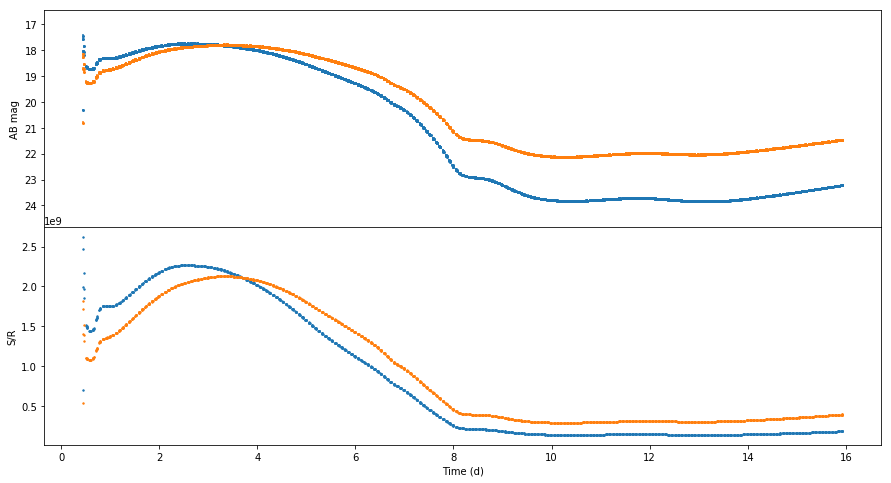

In [3]:
create_and_plot_lc("../astroduet/data/SNIIb_lightcurve_DUET.fits", distance=100e6*u.pc)

Now specifying the observing window...

Effective PSF size 7.337363286630968 arcsec
Number of effective bgd pixels: 3.597839101366366



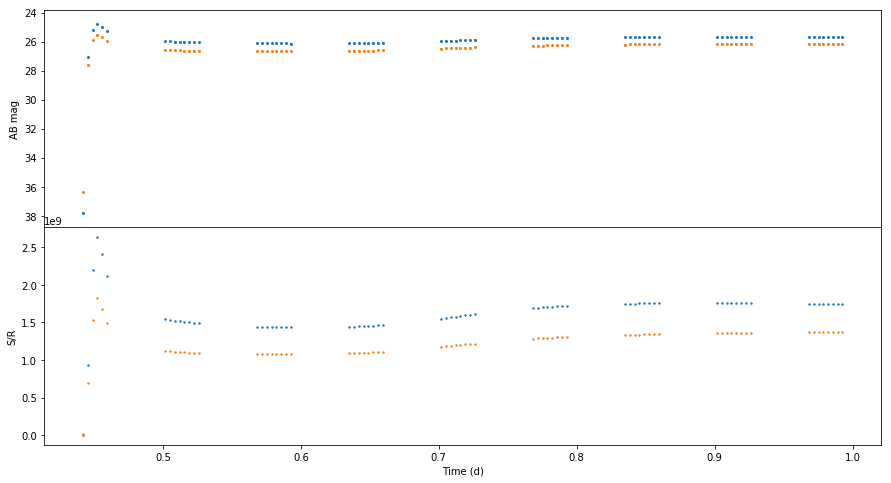

In [4]:
create_and_plot_lc("../astroduet/data/SNIIb_lightcurve_DUET.fits", distance=3000e6*u.pc,
                  observing_windows=np.array([[0, 90000]])*u.s, phase_start=0.5, exposure_per_orbit=40*60.)

In [5]:
def plot_realistic_lightcurve(lightcurve, exposure, label=None):
    lightcurve = lightcurve_through_image(lightcurve, exposure=exposure)
    lightcurve_rebin = lightcurve_through_image(lightcurve, exposure=exposure, final_resolution=1200*u.s)
    plt.figure(figsize=(15, 10))
    for lc in lightcurve, lightcurve_rebin:
        good = lc['photflux_D1_fit'] > 0
        plt.errorbar(lc['time'].value[good] / 86400, 
                     lc['photflux_D1_fit'][good], 
                     yerr=lc['photflux_D1_fiterr'][good], fmt='o')
        plt.errorbar(lc['time'].value[good] / 86400, 
                     lc['photflux_D2_fit'][good], 
                     yerr=lc['photflux_D2_fiterr'][good], fmt='s')
    plt.xlabel("Time (d)")
    plt.ylabel("Flux")
    plt.title(label)


Effective PSF size 7.337363286630968 arcsec
Number of effective bgd pixels: 3.597839101366366



100%|██████████| 23/23 [00:09<00:00,  2.55it/s]


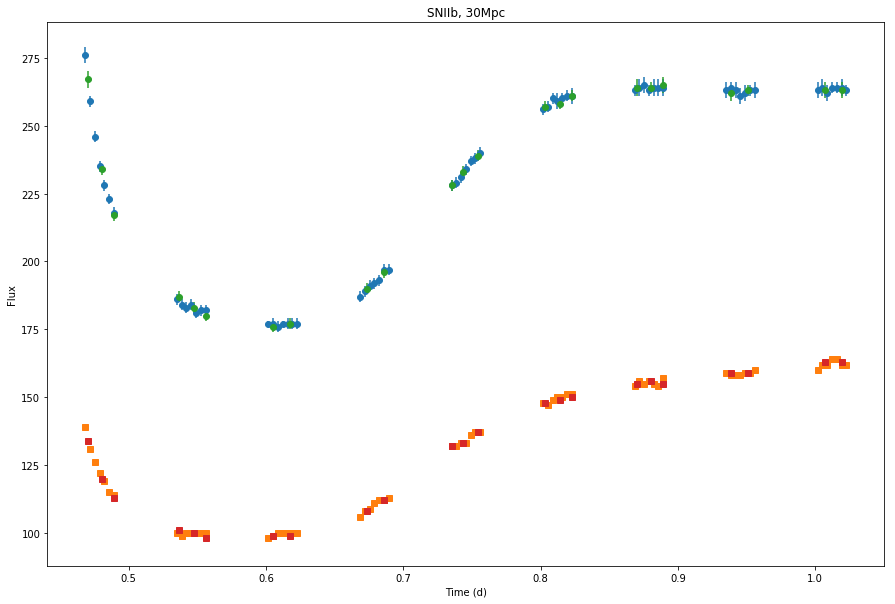

In [6]:
plot_realistic_lightcurve(
    get_lightcurve("../astroduet/data/SNIIb_lightcurve_DUET.fits", 
                   observing_windows=np.array([[0, 90000]]) * u.s, 
                   distance=30e6*u.pc), 300 * u.s, label="SNIIb, 30Mpc")

Effective PSF size 7.337363286630968 arcsec
Number of effective bgd pixels: 3.597839101366366



100%|██████████| 41/41 [00:16<00:00,  2.49it/s]


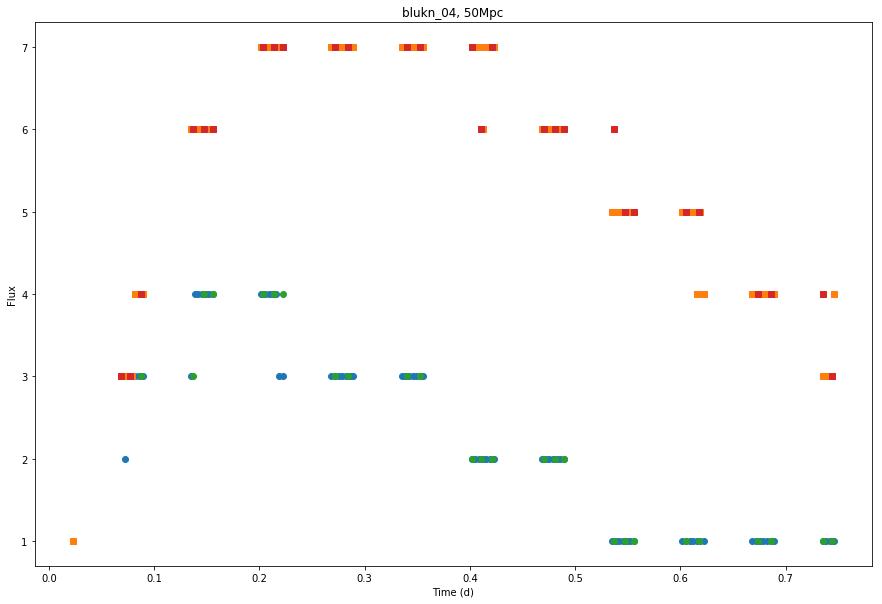

In [7]:
plot_realistic_lightcurve(
    get_lightcurve("../astroduet/data/blukn_04_lightcurve_DUET.fits", 
                   observing_windows=np.array([[0, 90000]]) * u.s, 
                   distance=50e6*u.pc), 
                   300 * u.s, label="blukn_04, 50Mpc")

Effective PSF size 7.337363286630968 arcsec
Number of effective bgd pixels: 3.597839101366366



100%|██████████| 41/41 [00:16<00:00,  2.53it/s]


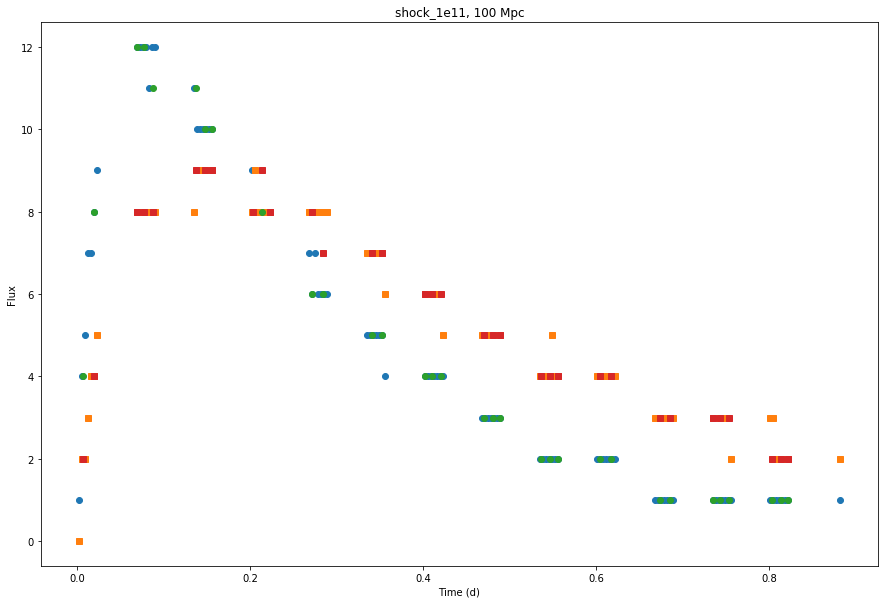

In [8]:
plot_realistic_lightcurve(
    get_lightcurve("../astroduet/data/shock_1e11_lightcurve_DUET.fits",
                   observing_windows=np.array([[0, 90000]]) * u.s, 
                   distance=100e6*u.pc),  
                   300 * u.s, 
                   label='shock_1e11, 100 Mpc')
